In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import optimistix as optx


jax.config.update("jax_enable_x64", True)

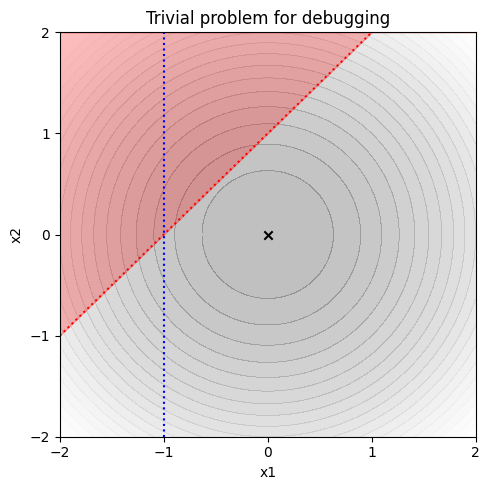

In [2]:
def f(y, args):
    del args
    x1, x2 = y
    return x1**2 + x2**2


def _wrapped_f(y):
    return f(y, None)


# TODO: we don't currently support not having equality constraints!
def g(y):  # Linear equality constraint
    x1, x2 = y
    return x1 + 1, x1 + 1 - x2


fig, ax = plt.subplots(1, 1, figsize=(5, 5))

limits = (-2, 2)
x = jnp.linspace(*limits, 100)
y = jnp.linspace(*limits, 100)
X, Y = jnp.meshgrid(x, y)
Z = _wrapped_f((X, Y))
ax.contourf(X, Y, Z, levels=20, alpha=0.25, cmap="Grays_r")

ax.plot([-2, 2], [-1, 3], "r:", label="constraint")
ax.fill_between(x, x + 1, 2, color="red", alpha=0.25)
ax.scatter(0, 0, c="k", marker="x", label="solution")
ax.axvline(-1, color="blue", linestyle=":")

ax.set_xlim(limits)
ax.set_ylim(limits)
ticks = [i for i in range(-2, 3)]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xlabel("x1")
ax.set_ylabel("x2")

ax.set_title("Trivial problem for debugging")
fig.tight_layout()

In [3]:
solver = optx.IPOPTLike(rtol=0, atol=1e-3)
# descent = optx.XDYcYdDescent()
# solver = eqx.tree_at(lambda s: s.descent, solver, descent)

y0 = jnp.array([1.0, 3.0])

solution = optx.minimise(f, solver, y0, constraint=g, throw=False)

solution.value, solution.state.f_info.bounds

(Array([-1.,  0.], dtype=float64),
 (Array([-inf, -inf], dtype=float64), Array([inf, inf], dtype=float64)))